In [15]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
import yfinance as yf

In [16]:
#import the data
dataset = wb.get_data_yahoo('GOOG', start='2015-01-01', end='2019-05-31')['Adj Close']

In [17]:
dataset.head()

Date
2015-01-02    521.937744
2015-01-05    511.057617
2015-01-06    499.212799
2015-01-07    498.357513
2015-01-08    499.928864
Name: Adj Close, dtype: float64

In [18]:
dataset.tail()

Date
2019-05-24    1133.469971
2019-05-28    1134.150024
2019-05-29    1116.459961
2019-05-30    1117.949951
2019-05-31    1103.630005
Name: Adj Close, dtype: float64

In [21]:
log_returns = np.log(1 + dataset.pct_change())

In [22]:
log_returns.tail()

Date
2019-05-24   -0.006420
2019-05-28    0.000600
2019-05-29   -0.015721
2019-05-30    0.001334
2019-05-31   -0.012892
Name: Adj Close, dtype: float64

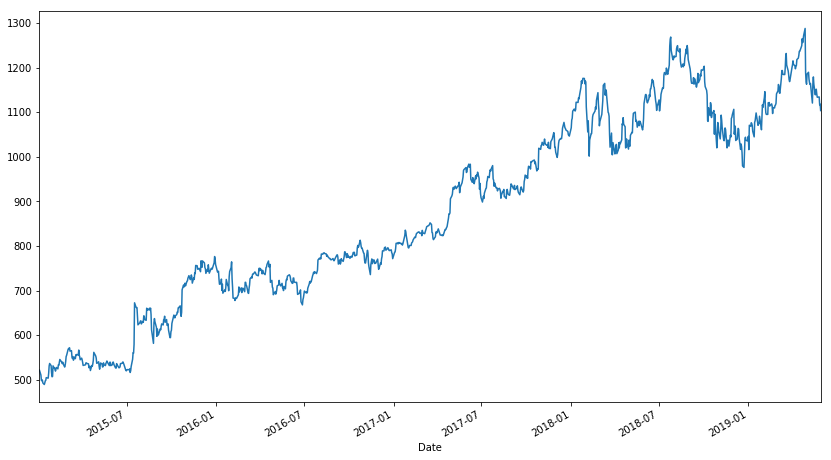

In [23]:
dataset.plot(figsize=(14,8))

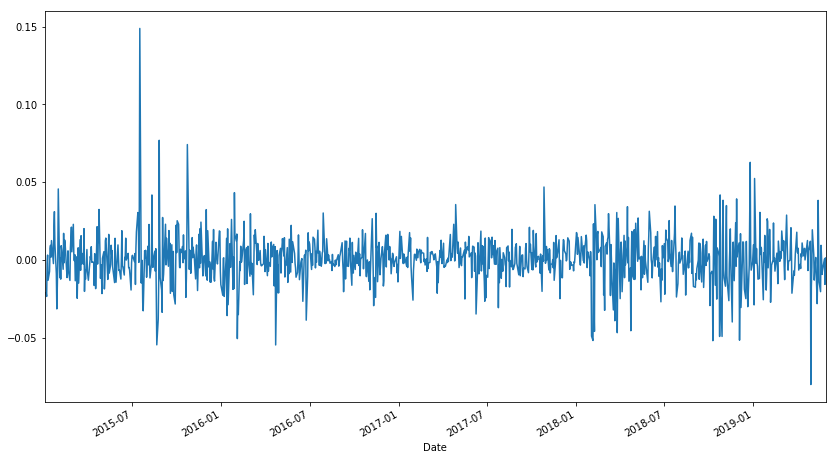

In [24]:
log_returns.plot(figsize=(14,8))

In [26]:
u = log_returns.mean()
u

0.0006752134476902781

In [27]:
var = log_returns.var()
var

0.00022686411545456254

In [28]:
stdev = log_returns.std()
stdev

0.015062009011236268

In [29]:
drift = u - (0.5 * var)
drift

0.0005617813899629968

In [30]:
np.array(drift)

array(0.00056178)

In [31]:
np.array(stdev)

array(0.01506201)

In [32]:
#set up a 95% chance of occurance
norm.ppf(0.95)

1.6448536269514722

In [33]:
x = np.random.rand(10,2)
x

array([[0.98251522, 0.68437623],
       [0.92543494, 0.78910574],
       [0.67657467, 0.51784063],
       [0.94541649, 0.39894894],
       [0.76430089, 0.92718376],
       [0.90458452, 0.31602393],
       [0.6680462 , 0.61476422],
       [0.87750195, 0.80454305],
       [0.61959998, 0.26901878],
       [0.72381268, 0.47596743]])

In [34]:
norm.ppf(x)

array([[ 2.10871071,  0.47997168],
       [ 1.44261088,  0.80332223],
       [ 0.45814167,  0.04473475],
       [ 1.60194837, -0.25606857],
       [ 0.72020592,  1.45513287],
       [ 1.30812484, -0.47884646],
       [ 0.43452451,  0.29175814],
       [ 1.16258946,  0.85796116],
       [ 0.30443036, -0.61578328],
       [ 0.59420555, -0.06027719]])

In [35]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.75873802, -0.63881812],
       [ 1.07533963, -2.06278442],
       [-1.09406345, -0.52975466],
       [-0.64280851,  0.14027366],
       [-0.6862734 ,  0.80243716],
       [-0.8149422 , -0.05299945],
       [-0.23736874,  0.29831213],
       [-0.89046295,  1.03728674],
       [ 0.7244003 , -0.02067939],
       [-1.3618525 ,  0.63776457]])

In [36]:
t_intervals = 1000
interations = 10

In [39]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[1.02228097, 1.02670569, 0.98960579, ..., 1.01415748, 0.98759337,
        1.00328778],
       [0.98683192, 0.99361218, 1.03769083, ..., 0.99650383, 1.01658895,
        1.02240003],
       [0.99398493, 0.98678155, 1.00388362, ..., 1.00493802, 0.97871879,
        1.01045335],
       ...,
       [1.00193191, 1.01238554, 0.99089601, ..., 0.98768962, 1.00777143,
        0.9889261 ],
       [0.98817369, 1.01328339, 1.0015077 , ..., 0.98551763, 1.00894319,
        1.01587575],
       [1.02046636, 1.00090731, 1.00537868, ..., 1.0226956 , 1.02939469,
        1.01850552]])

In [40]:
s_zero = dataset.iloc[-1]
s_zero

1103.6300048828125

In [41]:
price_list = np.zeros_like(daily_returns)

In [42]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
price_list[0] = s_zero
price_list

array([[1103.63000488, 1103.63000488, 1103.63000488, ..., 1103.63000488,
        1103.63000488, 1103.63000488],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [45]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [46]:
price_list

array([[1103.63000488, 1103.63000488, 1103.63000488, ..., 1103.63000488,
        1103.63000488, 1103.63000488],
       [1089.09731197, 1096.58021706, 1145.22673729, ..., 1099.77153157,
        1121.93806434, 1128.35135283],
       [1082.54631242, 1082.08513039, 1149.67436508, ..., 1105.20222487,
        1098.06186832, 1140.14639888],
       ...,
       [1343.35735566, 2460.8900095 , 2353.27361757, ..., 1439.94857093,
        2769.59816072,  793.01896423],
       [1327.47038938, 2493.57896228, 2356.82165087, ..., 1419.09470097,
        2794.36720002,  805.60873145],
       [1354.6388765 , 2495.84140943, 2369.49824863, ..., 1451.30190546,
        2876.50675278,  820.51693731]])

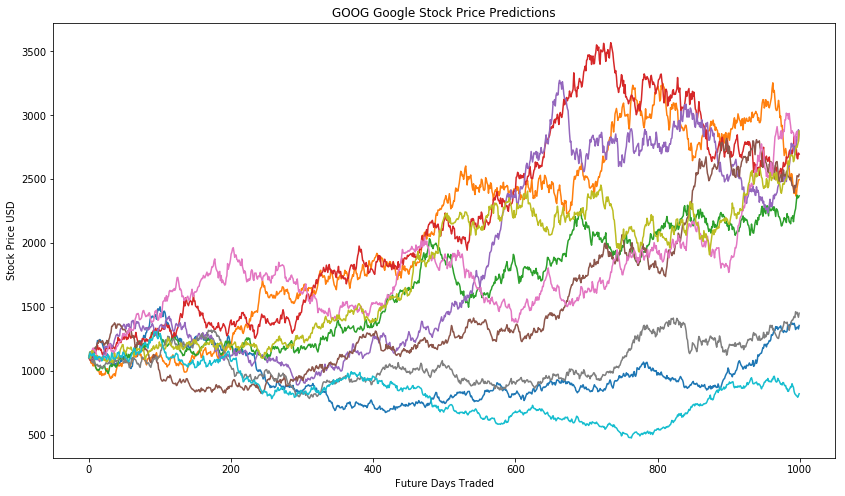

In [48]:
plt.figure(figsize=(14,8))
plt.title('GOOG Google Stock Price Predictions')
plt.xlabel('Future Days Traded')
plt.ylabel('Stock Price USD')
plt.plot(price_list)